In [90]:
import pandas as pd
import pyfolio as pf
import matplotlib.pyplot as plt
from genesis import *

# Price Data 

In [92]:
px = read_prices("../Dymon/Code Data/carry_adj_fx_returns.csv")
px.columns = [x[0] for x in px.columns]
rtns = px.diff()

rtns = rtns.loc[:"2016"]

# Settings

In [93]:
s = Settings(start_date = "2011-01-01", end_date = "2020-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=130,
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=130,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=260)

# Other Data

In [124]:
swaps = pd.read_csv("../Dymon/Code Data/swaps.csv", index_col=0).iloc[2:]

In [133]:
swaps.columns = ["2Y", "5Y"]
swaps = swaps.astype(float)

In [141]:
spread = (swaps["5Y"] - swaps["2Y"])

# Signal 

In [95]:
signal3 = rolling_mean(zscore(rtns, 130), 5)

In [96]:
b3 = Backtest(signal = signal3, asset_returns = rtns, tcost = abs(rtns*0), settings = s)
b3.run()

Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [87]:
full_summary(b3, "2000")

Returns   : 0.08437417416949701
Vol       : 0.11215631495654574
SR        : 0.7522908915310498
Hit rate  : 0.547
W | N | L : 0.49 | 0.06 | 0.45
W/L Ratio : 1.08
----------------------------------
Returns   : 0.08437417416949701
Vol       : 0.11215631495654574
SR        : 0.7522908915310498
Hit rate  : 0.547
W | N | L : 0.49 | 0.06 | 0.45
W/L Ratio : 1.08


In [88]:
get_returns_stats(b3.asset_rtn, b3.wts)

,AUDUSD,USDCAD,USDCHF,USDCNY,EURUSD,GBPUSD,USDINR,USDJPY,USDKRW,USDNOK,NZDUSD,USDPHP,USDSEK,USDSGD,USDTHB,USDTWD,USDIDR,USDMYR,USDCNH
annualized_return,0.252896,0.084072,0.24002,6.33164,0.251819,0.152061,0.256723,0.171776,0.382055,0.03793,-0.069207,-0.359655,-0.285375,0.157051,0.907129,0.117541,-0.234789,0.062146,-0.018416
sharpe,0.177819,0.062652,0.209386,1.708307,0.218049,0.116746,0.269527,0.126241,0.242993,0.031293,-0.052776,-0.310728,-0.252241,0.120028,0.547322,0.123357,-0.162813,0.053811,-0.019645
dollar_sharpe,0.173043,0.05661,0.201375,1.365799,0.212354,0.10802,0.264257,0.118806,0.232538,0.024985,-0.059303,-0.313789,-0.256226,0.110588,0.54633,0.115244,-0.169056,0.048078,-0.024258
trade_sharpe,0.177819,0.062652,0.209386,1.708307,0.218049,0.116746,0.269527,0.126241,0.242993,0.031293,-0.052776,-0.310728,-0.252241,0.120028,0.547322,0.123357,-0.162813,0.053811,-0.019645
long_sharpe,0.404888,0.07692,-0.039552,3.49655,0.61256,0.594039,0.30969,0.856817,0.66035,0.035975,0.314484,-0.687391,-0.327599,0.290055,-0.011553,0.574798,-0.369381,0.532753,-0.226559
short_sharpe,0.064563,0.049891,0.443702,-0.246829,-0.109758,-0.251347,0.498165,-0.545149,-0.400037,0.028265,-0.317843,-0.018285,-0.181086,-0.076595,1.30262,-0.412847,0.094878,-0.574988,0.304754
sortino,0.107981,0.035031,0.118163,0.910088,0.131426,0.060982,0.122503,0.074293,0.109583,0.017657,-0.03303,-0.118812,-0.141127,0.069802,0.361502,0.053843,-0.062443,0.021373,-0.006282
max_drawdown,-3.864119,-4.706147,-3.613691,-8.966858,-1.78553,-4.256849,-2.48658,-5.778485,-5.123398,-4.38108,-5.275619,-7.764629,-5.809898,-4.091171,-2.748598,-5.46844,-8.171395,-4.342717,-3.004371
max_drawdown_start,2002-06-17,2008-10-27,2011-08-09,2005-06-06,2002-07-01,2014-09-08,2004-12-06,2005-05-20,2008-10-08,2008-10-22,2002-06-06,2010-05-06,2008-10-06,2003-05-15,2001-09-03,2015-01-27,2005-08-29,2007-06-13,2014-03-20
max_drawdown_end,2005-09-07,2011-07-13,2016-08-10,2012-05-02,2002-07-25,2016-06-29,2005-09-02,2012-11-15,2008-11-06,2013-02-13,2007-01-31,2014-08-27,2016-12-27,2011-07-15,2002-06-13,2016-12-19,2011-09-07,2008-06-17,2016-11-11


<AxesSubplot:title={'center':'Monthly returns (%)'}, xlabel='Month', ylabel='Year'>

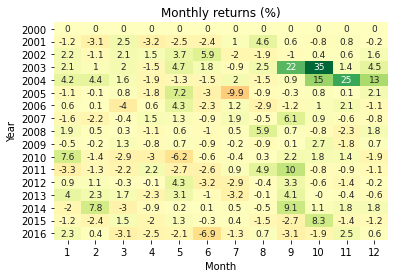

In [98]:
pf.plot_monthly_returns_heatmap(b3.model_rtn)

In [100]:
shorts = b3.asset_rtn_tc[b3.wts < 0].fillna(0).sum(1)
longs = b3.asset_rtn_tc[b3.wts > 0].fillna(0).sum(1)

<AxesSubplot:ylabel='Cumulative returns'>

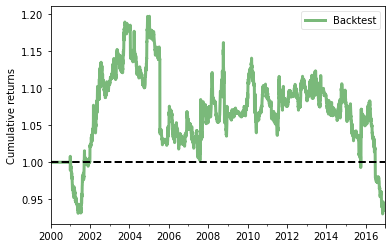

In [102]:
pf.plotting.plot_rolling_returns(shorts)

<AxesSubplot:ylabel='Cumulative returns'>

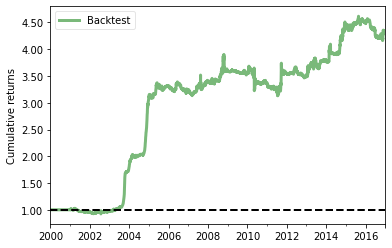

In [104]:
pf.plotting.plot_rolling_returns(longs)

In [108]:
longs.name = "Long"

In [109]:
shorts.name = "Shorts"

<AxesSubplot:ylabel='Cumulative returns'>

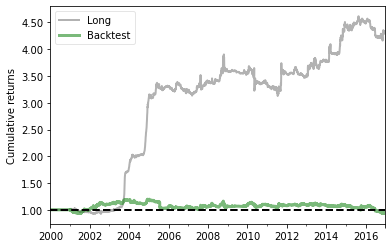

In [111]:
pf.plotting.plot_rolling_returns(shorts, longs)

AUDUSD


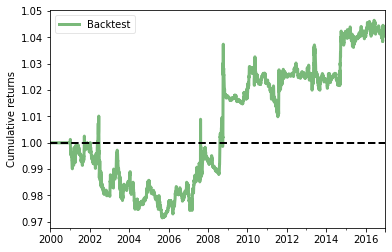

USDCAD


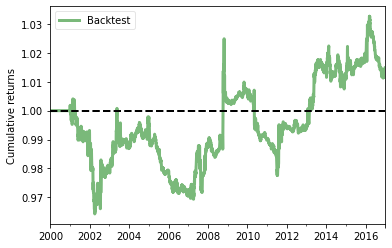

USDCHF


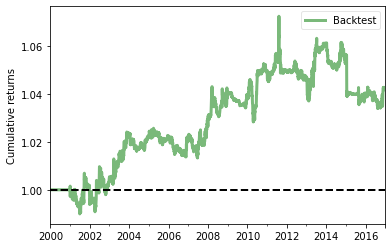

USDCNY


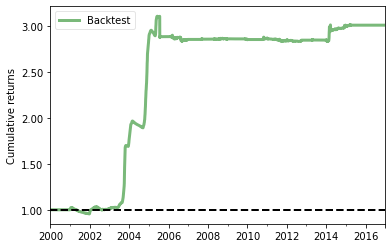

EURUSD


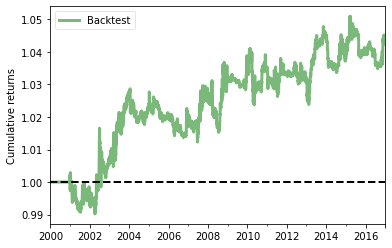

GBPUSD


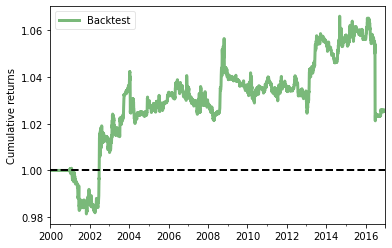

USDINR


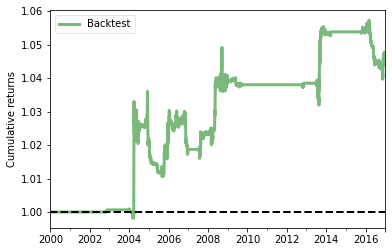

USDJPY


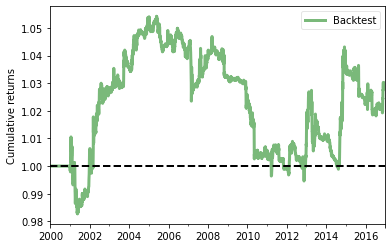

USDKRW


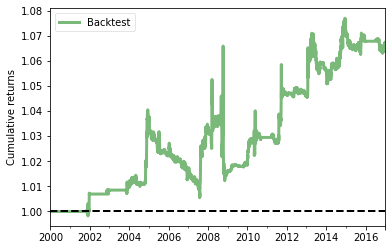

USDNOK


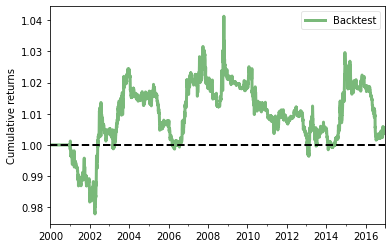

NZDUSD


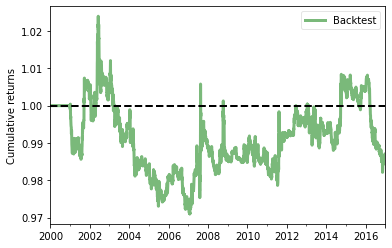

USDPHP


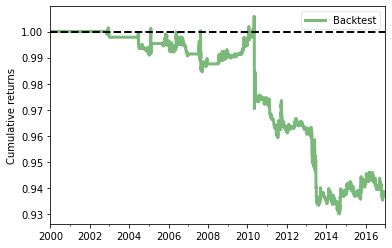

USDSEK


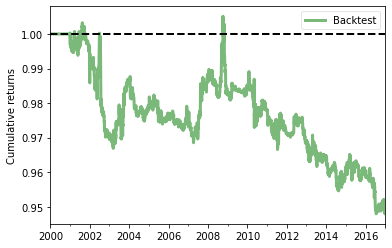

USDSGD


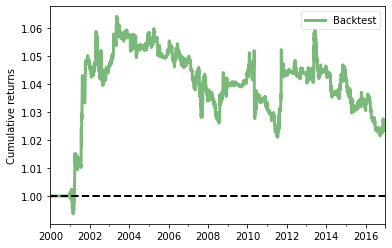

USDTHB


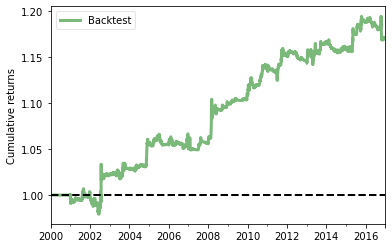

USDTWD


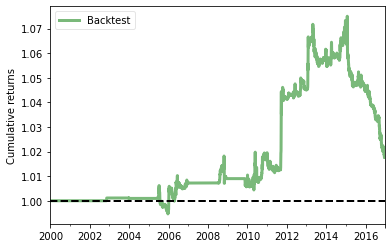

USDIDR


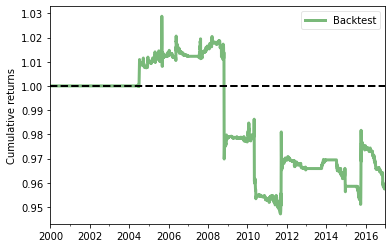

USDMYR


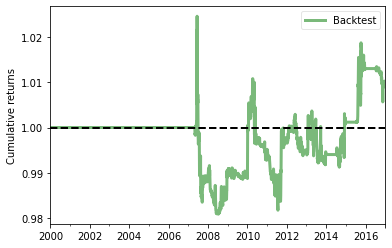

USDCNH


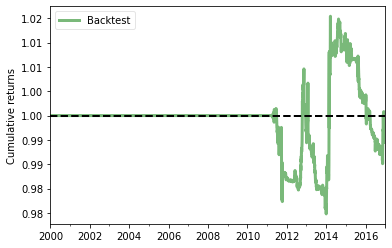

In [113]:
for i in rtns.columns:
  print(i)
  bt_returns = b3.asset_rtn_tc[i]
  pf.plotting.plot_rolling_returns(bt_returns)
  plt.show()

Start date,2000-01-03
End date,2016-12-30
Total months,211
,Backtest
Annual return,8.1%
Cumulative returns,295.0%
Annual volatility,11.2%
Sharpe ratio,0.75
Calmar ratio,0.30
Stability,0.71
Max drawdown,-27.2%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,27.16,2008-10-08,2011-07-14,2014-09-25,1557
1,21.67,2014-12-16,2016-11-11,NaT,NaN
2,17.12,2005-05-30,2007-04-09,2008-09-03,853
3,11.48,2001-01-02,2001-07-23,2002-04-26,344
4,5.96,2002-06-28,2002-07-25,2002-07-26,21


c:\users\vin_s\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:418: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\vin_s\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:418: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\vin_s\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:418: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\vin_s\appdata\local\programs\py

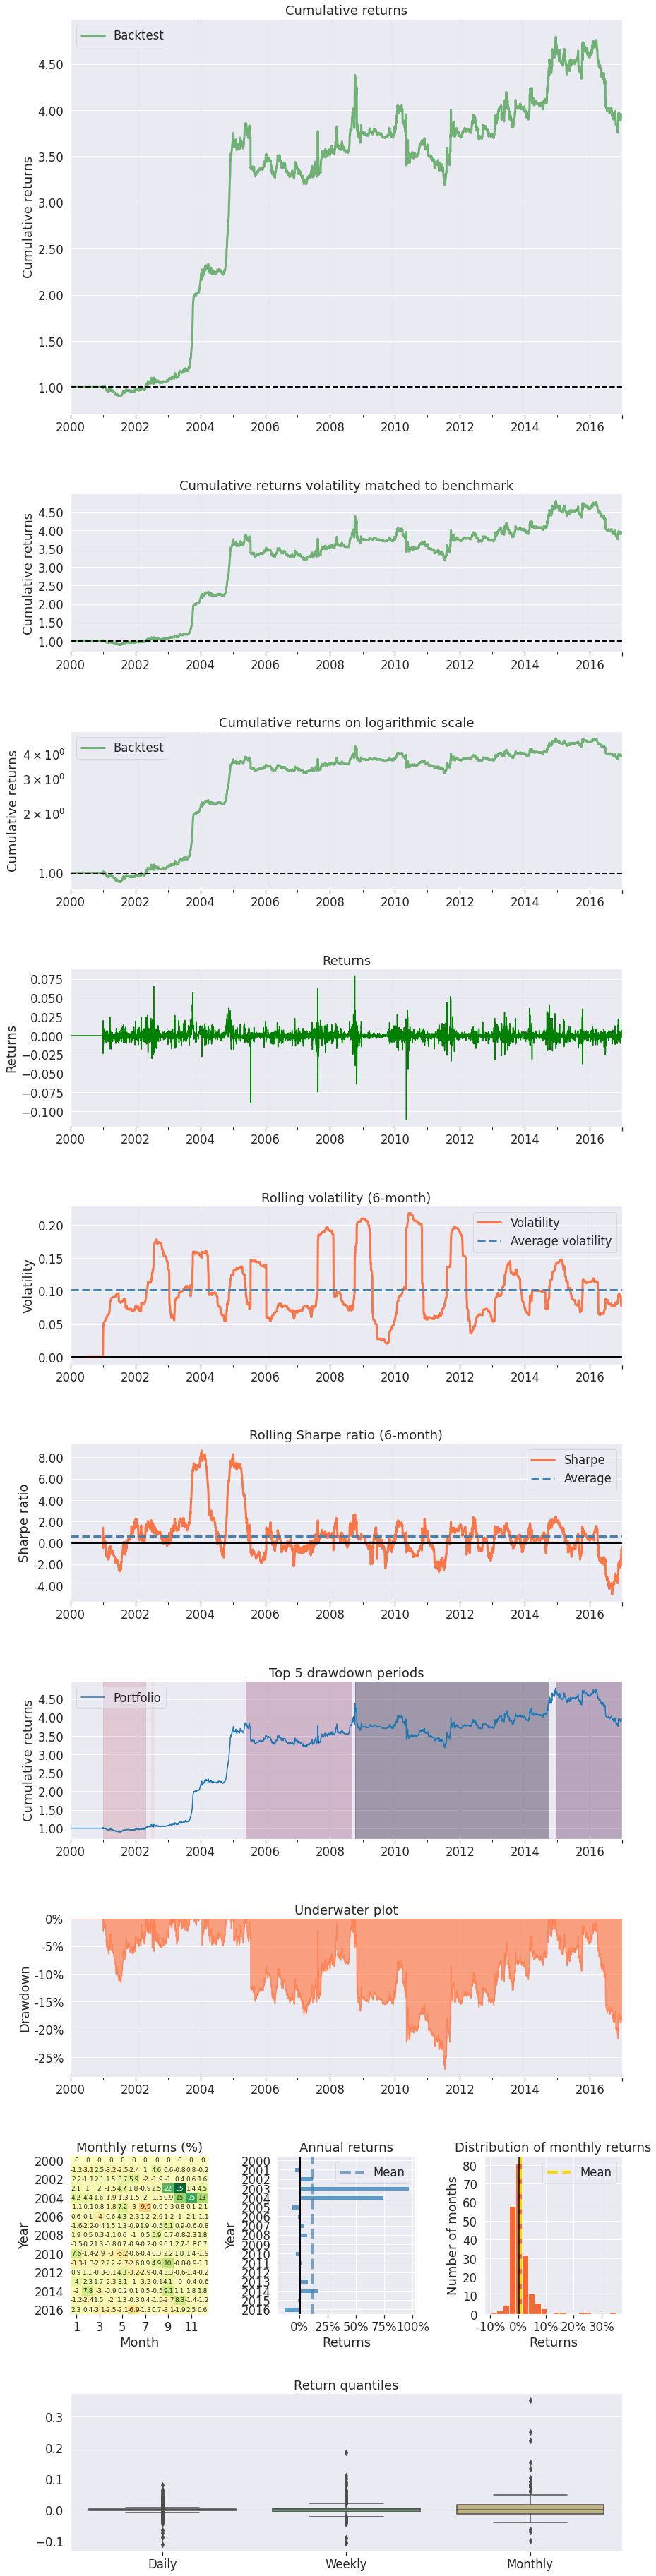

In [89]:
fig = pf.create_returns_tear_sheet(b3.model_rtn_tc[b3.model_rtn.index > "2000-01-01"], return_fig=True)

for ax in fig.axes:
        ax.tick_params(
        axis='x',           # changes apply to the x-axis
        which='both',       # both major and minor ticks are affected
        bottom=True,
        top=False,
        labelbottom=True)    # labels along the bottom edge are on